<a href="https://colab.research.google.com/github/Harsh-58/DataScienceA2/blob/main/HarsJainU2proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install preliz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.6/505.6 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 42.8 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
osqp 0.6.7.post0 requires scipy!=1.12.0,>=0.13.2, but you have scipy 1.12.0 which is incompatible.


In [6]:
import preliz as pz

In [7]:
import numpy as np
import arviz as az
import pymc as pm
#libraries needed to run code

## **What will Virgil Van Dijk's tackle success rate be in the 2024/2025 premier league season?**

**Context**: Virgil Van Dijk is the captain Liverpool FC, a soccer team in the English Premier League. The EPL is arguably the best soccer league in the world with many elite players and Van Dijk is one of them. Over the past 4 seasons he's been regarded as one of the best current center backs. He is known for his ability to win 1 vs. 1 duels, and this can be quantified using tackle success rate. A successful tackle is defined when a player connects with the ball in a legal, ground level challenge and successfully takes the ball away from the opposition player. I want to predict his tackle success rate for the ongoing premier league season (2024/2025) using past data and my prior.

**Why**?: Since I also play center back and Van Dijk is one of the players I look up to and I want to predict his performance for the season. I feel like he's slowing down and losing some of his aggressiveness but I'm interested in what the data suggests.

**Prior**: I would assume that a good center back wins around 70% of his tackles since thats winning around 3/4 duels, which is impressive. After doing some research I found out that the top centerbacks from the past couple of seasons have a Tackle Success Rate of around 60%-70%, using this knowledge and my own knowledge I'm going to make my prior 65%.

<Axes: >

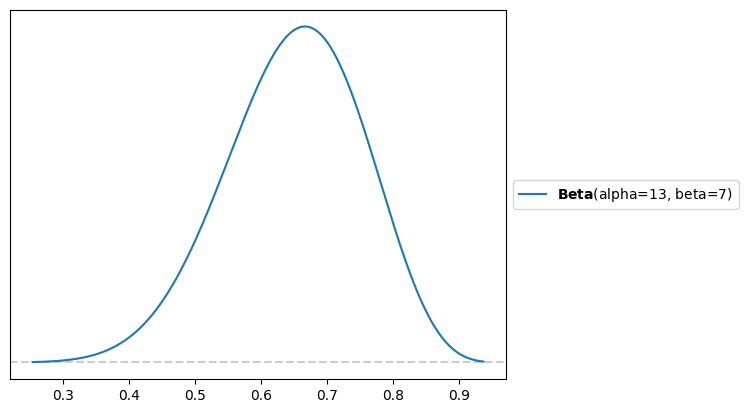

In [10]:
pz.Beta(alpha=13,beta=7).plot_pdf()
#Beta is successful tackles
#Alpha is unsuccessful tackles

When making predictions based on this prior knowledge, the expected value corresponds to the mean, the central value is the median, and the most probable value is the mode.

In [11]:
#store the prior distribution for the Tackle Success Rate percentage
# TR= Tackle Rate
TR_prior = pz.Beta(alpha=13,beta=7)

#preliz does not have a function that returns the mode, so I will use a formula
TR_prior_mode = (TR_prior.alpha - 1)/(TR_prior.alpha + TR_prior.beta - 2)

#mean, median, mode
TR_prior.mean(), TR_prior.median(), TR_prior_mode

(0.65, 0.655091431597747, 0.6666666666666666)

Introducing new info to gain a posterior: Now if we add the data about his tackles from the 2015/2016 season to the 2023/2024 season we see that out of 413 tackles attempted, 273 were successful. Data is from the official premier league website.

In [13]:
#prior information
alpha_old = 13
beta_old = 7

#likelihood info, or data from the Premier League
k = 273 #successful tackles
n = 413 #total tackles attempted

#'analytic' here means that we found the solution directly using a closed form
# mathematical formula
analytic_TR = pz.Beta(alpha = alpha_old + k,beta = beta_old + n - k )

#Van Dijk expected successful tackle rate
analytic_TR.mean()

0.6605080831408776

This code calculates Van Dijk's expected tackle success rate using a Beta distribution. The prior information (alpha = 13, beta = 7) is combined with data from the Premier League (273 successful tackles out of 413 attempts), and the expected success rate= 66% is calculated.

This is a probabilistic estimate of Van Dijk's tackle success rate based on prior assumptions and observed data, giving us a single value that represents his expected tackle success rate.

<Axes: >

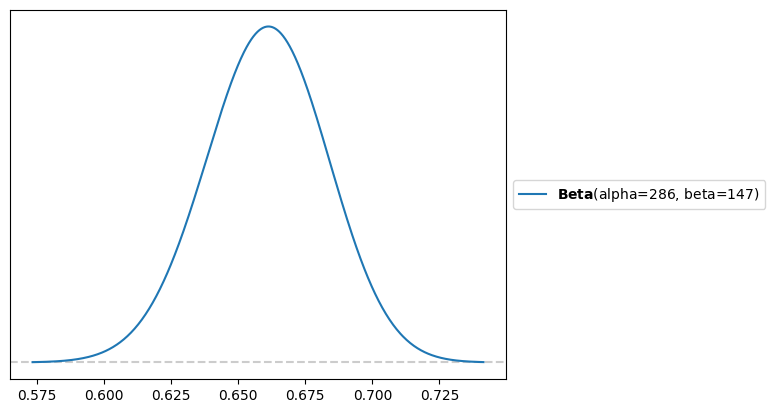

In [14]:
analytic_TR.plot_pdf()

The plot helps you see the distribution of possible tackle success rates for Van Dijk, with the peak representing the most likely rate and the spread that shows the uncertainty around the prediction.

In [16]:
TR_data = np.repeat([1,0], repeats = [273,140])

Now, to see the confidence interval and the spread of predicted values we use Pymc.

In [17]:
with pm.Model() as VD_TR_model:
  #we define our prior with a prediction using data from other players
  θ = pm.Beta('θ' , alpha = 13. , beta = 7.)

  #Think of Bernoulli as a stand in for the binomial distribution
  #It doesn't have inherent info about number of attempts, but number of attempts
  #is included in the data anyway.
  y = pm.Bernoulli('y', p = θ, observed = TR_data)

  #this part is new. We sample from our posterior because we don't actually
  #have a formula for it.
  idata_TR = pm.sample(1000)

In [18]:
import arviz as az

<Axes: title={'center': 'θ'}>

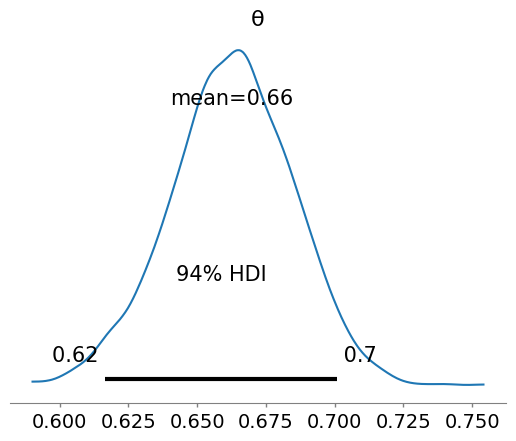

In [20]:
az.plot_posterior(idata_TR)


In this PyMC model, the 94% HDI indicates there's a 94 percent chance that Van Dijk's tackle success rate for the 2024/2025 season will fall between .62 and .7. The model has a mean of .66, which is the predicted value for his successful tackle rate. This is a reasonable estimate, but I personally believe the likelihood is closer to the lower end of this range (closer to .62 than .7) because of Van Dijk's recent performances where it looks like he has lost some quality. This might be due to his age or he's just struggling at the moment.

The overall shape of the posterior distribution is similar to the analytic plot we discussed earlier, but it's slightly more irregular since it's based on a large number of samples from the posterior.

Making this project taught me the influence of good amounts of data on predictions. The more data you have, the more accurate the predicted values.